# Autoencoder - Generator

***!!! Insight - I should use a Dense NN instead of convolutional NN because I want just one vector in the encoder choke point. !!!***

1. Train an Autoencoder on faces ---> ***DONE!***
2. Save weights / trained model ---> ***DONE!***
3. Save all encodings in the choke point (encoder) in Autoencoder for all faces to a new database
4. Run PCA on all encodings from the encoder
5. Generate new faces based on PCA
6. Create a slider for new face generation (like CaryKH or as a web app)

Next steps:
- Publish on personal website
- Publish on Youtube as video
- Publish dataset on Kaggle
- Publish Jupyter notebook on GitHub

Checkpoints:
- train model - **DONE!**
- save model - **DONE!**
- save encodings at chokepoint **In progress**
- run PCA on encodings

In [1]:
# Load libraries
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps
import os

In [2]:
# Image dimensions in dataset:
# 200x200x3

dataset_folder = "C:/Users/miros/Desktop/Datasets/faces/normalized_images"
test_folder = "C:/Users/miros/Desktop/Projects/Hair color classification/testing_data_augmented"

## Assign photos to dataset

In [3]:
# Functions to assign photos to dataset

def load__grayscale_images_to_dataset(folder):
    dataset = []
    for i, filename in enumerate(os.listdir(folder)): # "Enumerate" is a way to index in a for loop
        image = Image.open(folder + "/{}".format(filename))
        image_grayscale = ImageOps.grayscale(image)
        data = np.asarray(image_grayscale)
        dataset.append(data)
    return dataset

def load_RGB_images_to_dataset(folder):
    dataset = []
    for i, filename in enumerate(os.listdir(folder)): # "Enumerate" is a way to index in a for loop
        image = Image.open(folder + "/{}".format(filename))
        data = np.asarray(image)
        dataset.append(data)
    return dataset

In [4]:
x_train = load_RGB_images_to_dataset(dataset_folder)
x_test = load_RGB_images_to_dataset(test_folder)

x_train = np.array(x_train) # Convert dataset to numpy array
x_test = np.array(x_test) # Convert test set to numpy array

## Normalize images

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
print(x_train.shape)
print(x_test.shape)

(1406, 200, 200, 3)
(35, 200, 200, 3)


## Load Trained Autoencoder model

In [22]:
path_to_model = 'C:/Users/miros/Desktop/Projects/Autoencoder to generate female faces/model/trained/'

In [23]:
# Load model from save
model = tf.keras.models.load_model(path_to_model)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 25, 25, 64)        23584     
_________________________________________________________________
sequential_1 (Sequential)    (None, 200, 200, 3)       23523     
Total params: 47,107
Trainable params: 47,107
Non-trainable params: 0
_________________________________________________________________


## Save chokepoint encodings / encoder output

In [26]:
encoder = model.layers[0]

In [28]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0

In [32]:
encoded_image = encoder.predict([x_train[0].reshape(-1, 200, 200, 3)])

In [33]:
print(type(encoded_image))

<class 'numpy.ndarray'>


In [38]:
print(encoded_image.shape)

encoded_flat = tf.reshape(encoded_image, [-1, 25 * 25 * 64])

(1, 25, 25, 64)


In [39]:
print(type(encoded_flat))
print(encoded_flat.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(1, 40000)


In [42]:
encoded_flat = encoded_flat.numpy()
print(type(encoded_flat))

<class 'numpy.ndarray'>


In [44]:
encoded_reshape = tf.reshape(encoded_flat, [200, 200])

In [45]:
print(type(encoded_reshape))
print(encoded_reshape.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(200, 200)


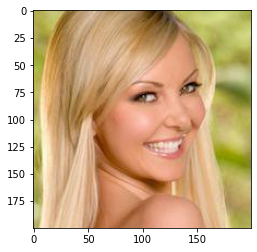

In [36]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

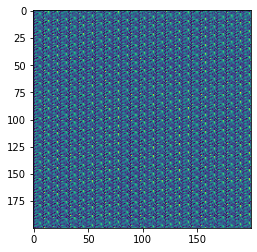

In [46]:
plt.imshow(encoded_reshape)
plt.show()